<a href="https://colab.research.google.com/github/cybersid123/AI-ML/blob/main/Customer_Segment_Project_GMM_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data  = pd.read_csv('customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.drop(['Channel', 'Region'], axis = 1, inplace = True)

In [ ]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#Data Exploration

In [ ]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
indices = [7,138,159]

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

samples



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7579,4956,9426,1669,3321,2566
1,13537,4257,5034,155,249,3271
2,355,7704,14682,398,8077,303


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

new_data = data.drop('Detergents_Paper', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25, random_state = 7)

regressor = DecisionTreeRegressor(random_state=7)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=7)

In [ ]:
score = regressor.score(X_test, y_test)

In [ ]:
score

0.6952561471969166

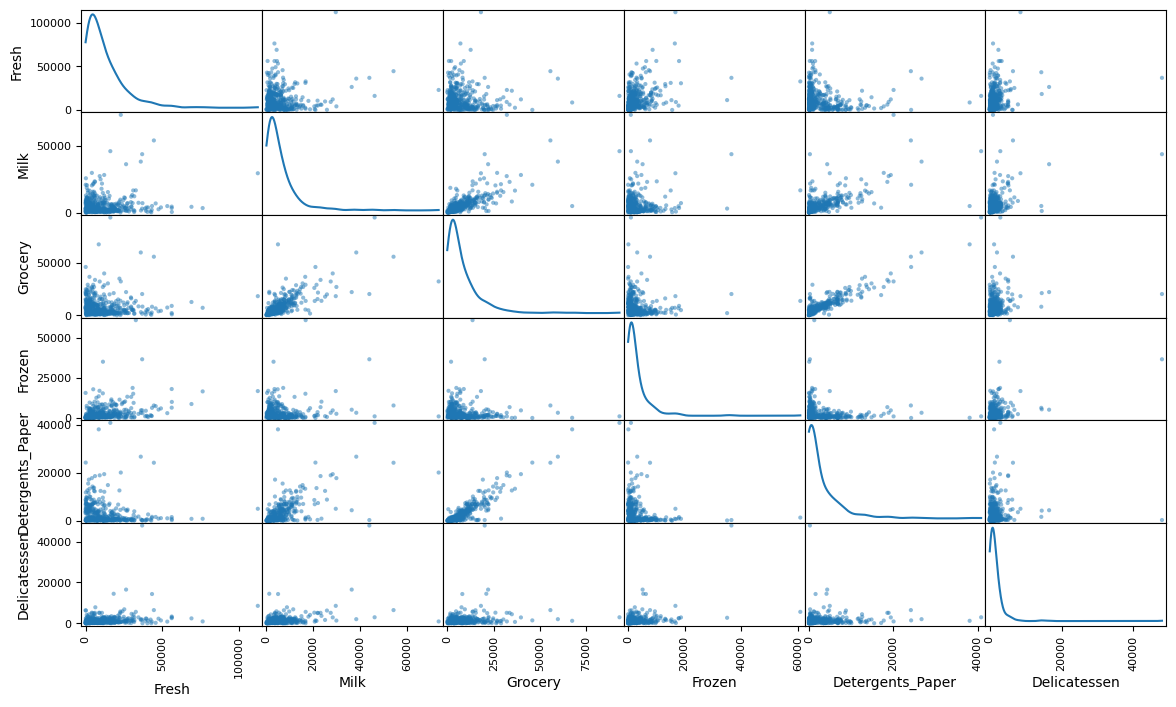

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (14,8), diagonal='kde');

<Axes: >

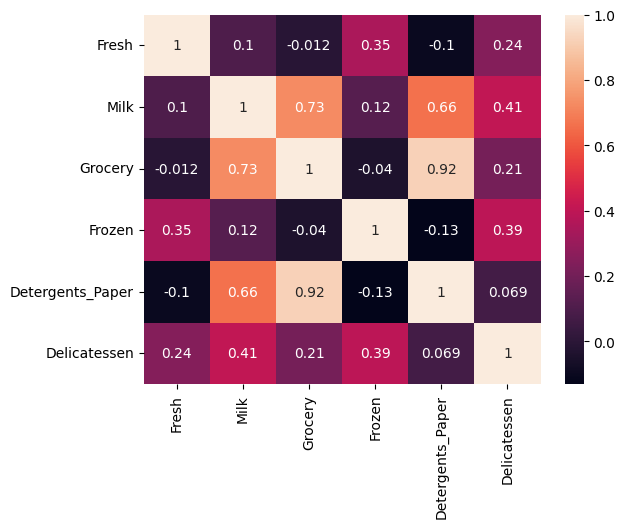

In [ ]:
sns.heatmap(data.corr(), annot = True)

#Data Preprocessing

##Feature scaling- non-linear scaling
Specially for financial data

In [ ]:
log_data = np.log(data)
log_samples = np.log(samples)


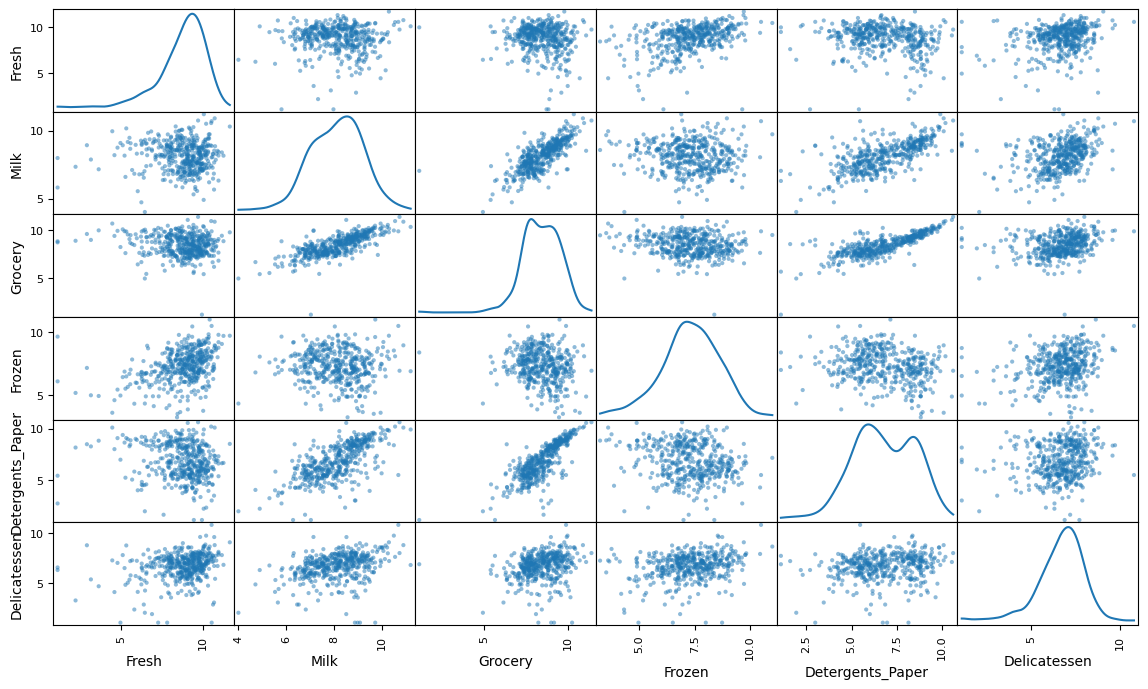

In [ ]:
scatter_matrix(log_data, figsize = (14,8), diagonal = 'kde');

In [ ]:

samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7579,4956,9426,1669,3321,2566
1,13537,4257,5034,155,249,3271
2,355,7704,14682,398,8077,303


In [ ]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
1,9.513182,8.356320,8.523970,5.043425,5.517453,8.092851
2,5.872118,8.949495,9.594378,5.986452,8.996776,5.713733


#Outlier detection

In [ ]:
outliers = []
for feature in log_data.keys():
  Q1 = np.percentile(log_data[feature], 25.)

  Q3 =np.percentile(log_data[feature], 75.)
  step = (Q3-Q1)*1.5
  print('Outlier step:', step)

  print('feature name - {}'.format(feature))
  temp_outliers = log_data[~(log_data[feature]>= Q1-step) & (log_data[feature]<= Q3+step)]
  display(temp_outliers)
  outliers = outliers + temp_outliers.index.tolist()



Outlier step: 2.533507868606793
feature name - Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step: 2.318248272818475
feature name - Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step: 2.398856213797138
feature name - Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step: 2.3493275010092116
feature name - Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step: 4.089358760938334
feature name - Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step: 2.2422806544219394
feature name - Delicatessen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [ ]:
outliers

[65,
 66,
 81,
 95,
 96,
 128,
 171,
 193,
 218,
 304,
 305,
 338,
 353,
 355,
 357,
 412,
 98,
 154,
 356,
 75,
 154,
 38,
 57,
 65,
 145,
 175,
 264,
 420,
 429,
 439,
 75,
 161,
 66,
 109,
 128,
 137,
 142,
 154,
 184,
 187,
 203,
 233,
 285,
 289,
 343]

In [ ]:
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

#Feature Transformation
###We will use PCA to draw conclusions about underlying strructure of wholesale customer.

In [ ]:
from sklearn.decomposition import PCA
import visuals as vs

In [ ]:
pca = PCA(n_components=6)
pca.fit(good_data)

PCA(n_components=6)

In [ ]:
pca_samples = pca.transform(log_samples)

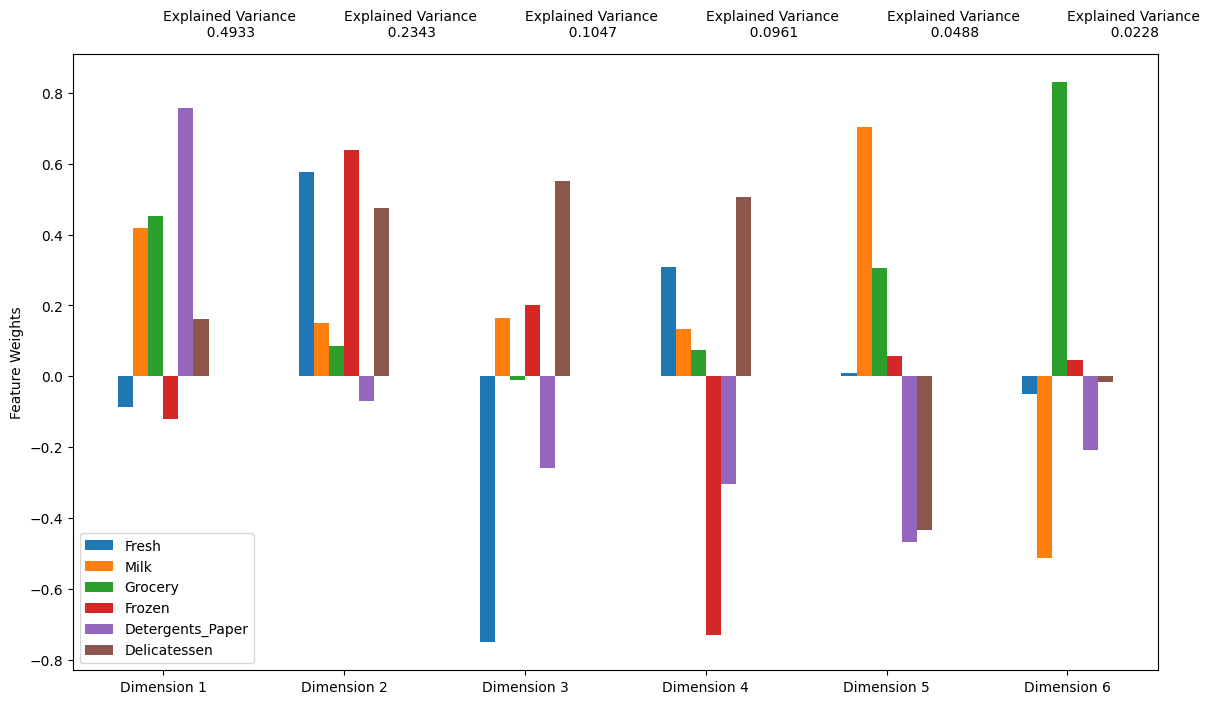

In [ ]:
pca_results = vs.pca_results(good_data, pca)

In [ ]:
pca_samples

array([[ 1.6470021 ,  0.497426  ,  0.28783001,  0.23849785, -0.58546256,
         0.11843901],
       [-0.38777479, -0.46872461,  0.15951957,  2.99892293,  0.09203137,
         0.07566601],
       [ 2.79718768, -3.15240569,  0.96092048, -0.92252852,  0.26195476,
         0.1987062 ]])

#Implimentation:Dimensionality Reduction

In [ ]:
pca = PCA(n_components = 2).fit(good_data)

reduced_data1 = pca.transform(good_data)

pca_samples = pca.transform(log_samples)



In [ ]:
pca_samples

array([[ 1.6470021 ,  0.497426  ],
       [-0.38777479, -0.46872461],
       [ 2.79718768, -3.15240569]])

In [ ]:
reduced_data = pd.DataFrame(reduced_data1, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [ ]:
reduced_data.head()

,Dimension 1,Dimension 2
0,1.757392,-0.731683
1,1.872580,0.420739
2,1.990207,1.226533
3,-1.000760,1.352189
4,1.004692,2.038762


In [ ]:
display(pd.DataFrame(np.round(pca_samples,4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.6470,0.4974
1,-0.3878,-0.4687
2,2.7972,-3.1524


In [ ]:
pca.components_.T

array([[-0.08718568,  0.57521592],
       [ 0.41743898,  0.15094759],
       [ 0.45257464,  0.08553378],
       [-0.11971655,  0.63845587],
       [ 0.7568412 , -0.06892616],
       [ 0.16179893,  0.4760764 ]])

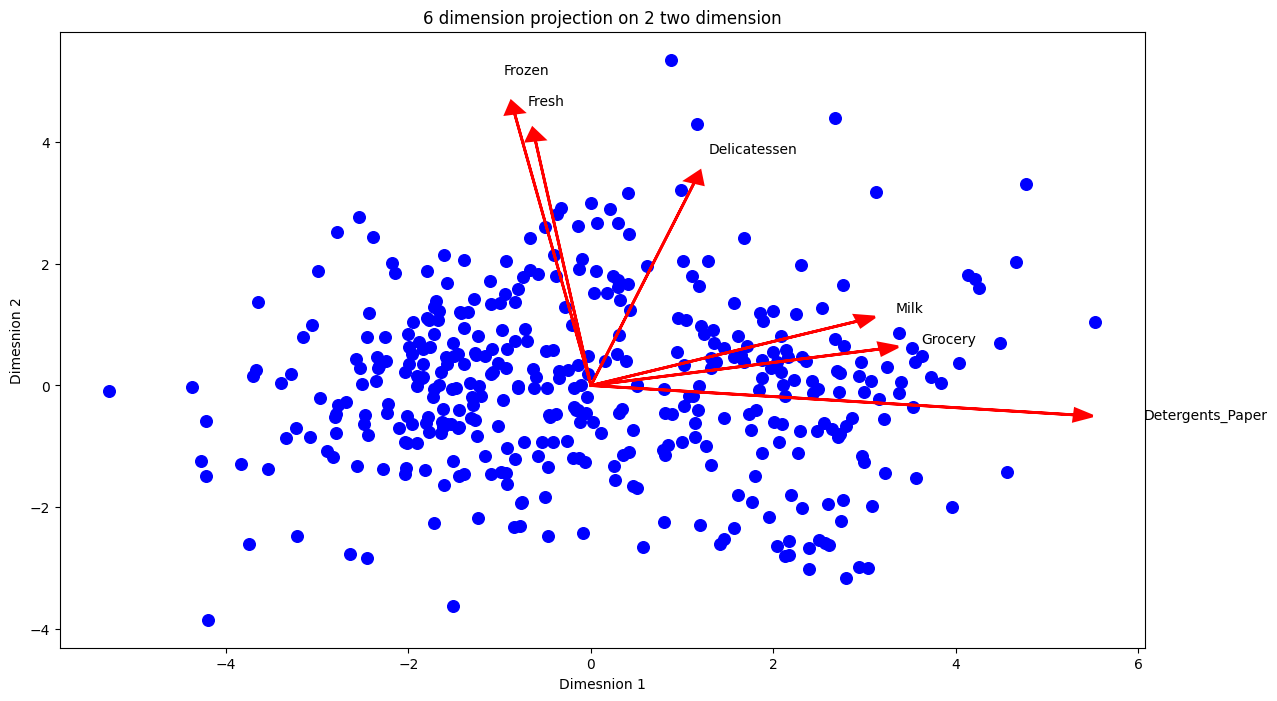

In [ ]:
vs.biplot(good_data, reduced_data, pca);

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score

def ApplyGMM(Cluster_number):
  global clusterer, preds, centers, sample_preds

  results = []

  clusterer = GMM(n_components = Cluster_number).fit(reduced_data)

  preds = clusterer.predict(reduced_data)

  centers = clusterer.means_

  sample_preds = clusterer.predict(pca_samples)

  score = silhouette_score(reduced_data, preds)

  results.append(Cluster_number)
  results.append(score)
  return results



In [ ]:
result = []
for Cluster_number in range(2,8):
  result = ApplyGMM(Cluster_number)
  print("Cluster Number: {} and Score:{}".format(result[0], result[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Cluster Number: 2 and Score:0.44310193025160527
Cluster Number: 3 and Score:0.37287129101454003


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Cluster Number: 4 and Score:0.3131799183078628


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Cluster Number: 5 and Score:0.3248352208020075
Cluster Number: 6 and Score:0.3338750708948325
Cluster Number: 7 and Score:0.31400010072443685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


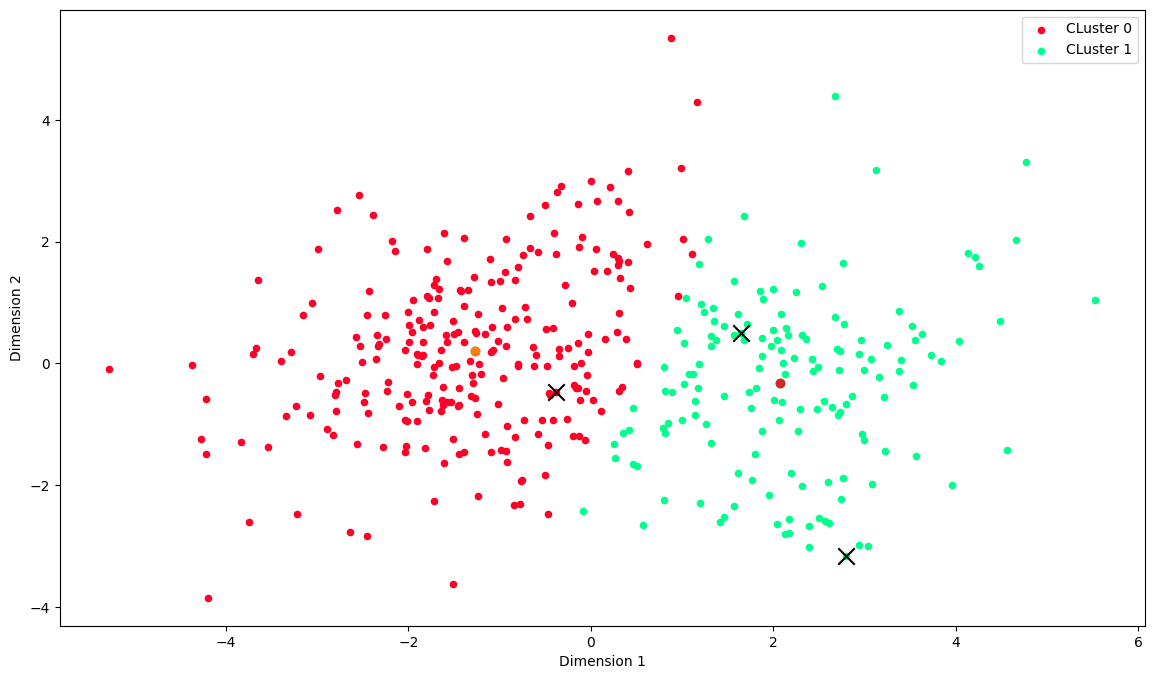

In [ ]:
ApplyGMM(2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [ ]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)



In [ ]:
true_centers

array([[ 9595.96699453,  2079.85962726,  2625.64397441,  2261.27331843,
          336.74308119,   816.84508203],
       [ 5297.87365246,  7757.91162845, 11400.12801968,  1083.13326607,
         4386.26101882,  1092.34816702]])

In [ ]:
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())

In [ ]:
true_centers.index = segments

In [ ]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9596.0,2080.0,2626.0,2261.0,337.0,817.0
Segment 1,5298.0,7758.0,11400.0,1083.0,4386.0,1092.0


In [ ]:
for i , pred in enumerate(sample_preds):
  print("Sample Point", i, " predicted to be in cluster", pred)

Sample Point 0  predicted to be in cluster 1
Sample Point 1  predicted to be in cluster 0
Sample Point 2  predicted to be in cluster 1


In [ ]:
pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7579,4956,9426,1669,3321,2566
1,13537,4257,5034,155,249,3271
2,355,7704,14682,398,8077,303


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
X = reduced_data1
gmm = GMM(n_components=2).fit(X)

In [ ]:
gmm

GaussianMixture(n_components=2)

<ipython-input-43-f71bac22ea92>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


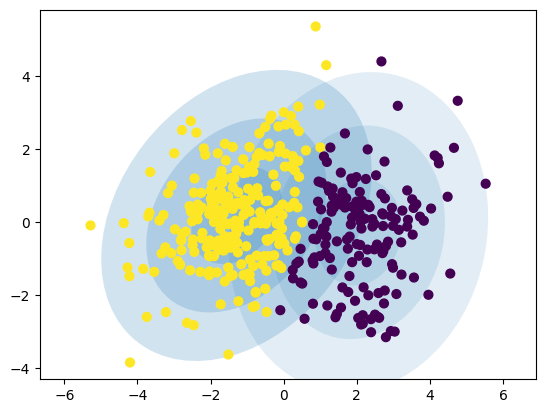

In [ ]:
plot_gmm(gmm, X);

<ipython-input-43-f71bac22ea92>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


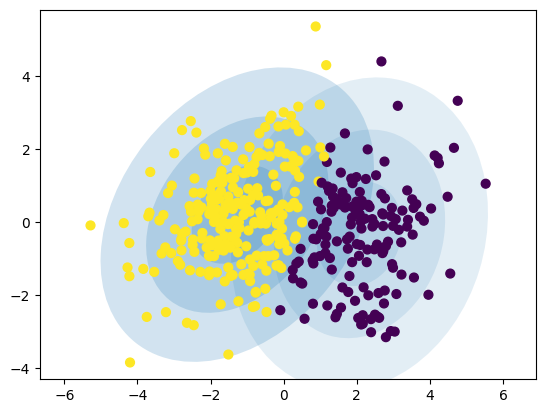

In [ ]:
plot_gmm(gmm, reduced_data1);